In [15]:
from skimage.segmentation import slic,mark_boundaries
from skimage import io
from skimage.data import astronaut
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
# np.set_printoptions(threshold=1e6)

In [21]:
np.set_printoptions(edgeitems=7)
img = astronaut()
# 100, 100, 3
# print(img.shape)
# superpixel_parameters = {'segs':200,
#                          'compactness':10,
#                          'max_iter':10,
#                          'sigma':1,
#                          'spacing':None,
#                          'multichannel':True,
#                          'convert2lab':None,
#                          'enforce_connectivity':False,
#                          'min_size_factor':0.5,
#                          'max_size_factor':3,
#                          'slic_zero':False}

segments = slic(
    img, 
    n_segments=200, 
    compactness=10, 
    max_iter=10,
    sigma=1,
    spacing=None,
    multichannel=True,
    convert2lab=None,
    enforce_connectivity=False,
    min_size_factor=0.5,
    max_size_factor=3,
    slic_zero=False
)

# 100, 100
print(segments)
print(segments[200:214, 200:214])
print(np.unique(segments))

E:\Anaconda\lib\site-packages\skimage\segmentation\slic_superpixels.py:156: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_z = grid_z[slices]
E:\Anaconda\lib\site-packages\skimage\segmentation\slic_superpixels.py:157: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_y = grid_y[slices]
E:\Anaconda\lib\site-packages\skimage\segmentation\slic_superpixels.py:158: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpret

[[ 15  15  29  29  15  15  15 ...  13  13  13  13  13  13  13]
 [  1   1  15  15  15  15   1 ...  13  13  13  13  13  13  13]
 [  1   1   1   1   1   1   1 ...  13  13  13  13  13  13  13]
 [  1   1   1   1   1   1   1 ...  13  13  13  13  13  13  13]
 [  1   1   1   1   1   1   1 ...  13  13  13  13  13  13  13]
 [  1   1   1   1   1   1   1 ...  13  13  13  13  13  13  13]
 [  1   1   1   1   1   1   1 ...  13  13  13  13  13  13  13]
 ...
 [182 182 182 182 182 182 182 ... 195 195 195 195 195 194 194]
 [182 182 182 182 182 182 182 ... 195 195 195 195 194 194 194]
 [182 182 182 182 182 182 182 ... 195 195 195 194 194 194 194]
 [182 182 182 182 182 182 182 ... 195 195 195 194 194 194 194]
 [182 182 182 182 182 182 182 ... 195 195 195 194 194 194 194]
 [182 182 182 182 182 182 182 ... 195 195 195 194 194 194 194]
 [182 182 182 182 182 182 182 ... 195 195 195 195 194 194 194]]
[[75 75 75 75 89 89 90 90 90 90 90 90 90 90]
 [75 75 89 89 89 89 90 90 90 90 90 90 90 90]
 [89 89 89 89 89 89 89

In [22]:
# 总的超像素数量, amax方法会返回最大的类别值
labels = segments
s = sp.amax(labels) + 1
# 超像素邻接矩阵预定义
adj = np.ones((s, s), np.bool)

# 对图像的各个像素的超像素标记进行遍历
for i in range(labels.shape[0] - 1):
    for j in range(labels.shape[1] - 1):
        # 下面的四个判断, 检查了以(i,j)为左上角的一个2x2像素区域四个像素之间的连通关系
        if labels[i, j] != labels[i+1, j]:
            # (i,j)与(i+1,j)不位于同一个超像素中, 就在超像素邻接矩阵中对应位置置为False
            # 注意, 有两个位置, 因为邻接矩阵可以表示有向图.
            adj[labels[i, j]  ,   labels[i+1, j]]                = False
            adj[labels[i+1, j],   labels[i, j]]                  = False
        if labels[i, j] != labels[i, j + 1]:
            # (i,j)与(i,j+1)
            adj[labels[i, j]  ,   labels[i, j+1]]                = False
            adj[labels[i, j+1],   labels[i, j]]                  = False
        if labels[i, j] != labels[i + 1, j + 1]:
            # (i,j)与(i+1,j+1)
            adj[labels[i, j]    ,  labels[i+1, j+1]]             = False
            adj[labels[i+1, j+1],  labels[i, j]]                 = False
        if labels[i + 1, j] != labels[i, j + 1]:
            # (i+1,j)与(i,j+1)
            adj[labels[i+1, j],   labels[i, j+1]]                = False
            adj[labels[i, j+1],   labels[i+1, j]]                = False
# 这里循环结束后, 得到的adj的超像素之间, 

# 这里确定了四个边上的像素对应的超像素标记, 这里会查找特定向量的唯一超像素标记的集合
upper_ids = sp.unique(labels[0,:]).astype(int)
right_ids = sp.unique(labels[:,labels.shape[1]-1]).astype(int)
low_ids = sp.unique(labels[labels.shape[0]-1,:]).astype(int)
left_ids = sp.unique(labels[:,0]).astype(int)

# np.append会拼接指定的向量. 四个边拼接起来, 得到的bd表示被认为是背景的超像素标记
bd = np.append(upper_ids, right_ids)
bd = np.append(bd, low_ids)
bd = sp.unique(np.append(bd, left_ids))

for i in range(len(bd)):
    for j in range(i + 1, len(bd)):
        # 任意两个包含边界像素的超像素, 对应的邻接关系也被设置为False
        adj[bd[i], bd[j]] = False
        adj[bd[j], bd[i]] = False

print(196*196)
print(np.sum(adj==False))
print(np.sum(adj==True))
print(np.sum(np.trace(adj)))

print(adj[1, 29])

# 这里反映出来, 并不是只有对角线处出现True

38416
4546
33870
196
False


连通区域(超像素)数量: 196
超像素0包含的像素数量 625
超像素1包含的像素数量 435
各个超像素包含的像素数量
 [ 625  435 1619 1606 2069 1143 1086 1081 1645 1505 1326  742 1683 1148
  799  629 1954 1948  924 1719 1899 1715 1552 1463  890 1096 1783 1224
 2204  531 1891 1909  916 1066 1127 1498  173 1693 1251 1579 1245 1610
 1855  339 1779 1745 1449 1173 1436  917 1507 1450  819 1041  997 2307
 1019 2348 1785  719  631 1609 1034 1821 1539 1639 1049  998 1187 2026
  935 1985  339  982  902 2364 1500 1237 1863 1362 1639 1236 1452 1391
  340 2596 1658  315  854 1765 2284 1594  650 1985 1108  869 1102 1980
 1702  633 1423 1730  356 1170  720 1078 1468  287 1004  851 1146  441
 1294 1425 1403 2064 2073 1729  716 1189 1918 1829 1041 2447 1718 2310
 1940 1559 1244 1096  488 1775 1210  677  737  929  436  489 1848 2245
  992 1946 1693  307 1474 1100  842 1741  737 2029  456  671 2471 1369
 1001 1384 1431  953 1336  842 1421 1149 1024 1870 2110 2035 1363  825
 1874  841 1990 2009  465 2212  557  980 1991  616  658 1105  809 1442
  432 1393 245

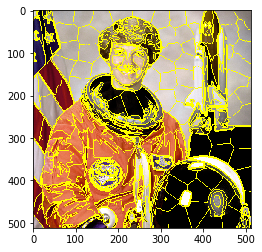

In [20]:
n_liantong=segments.max()+1
print('连通区域(超像素)数量:', n_liantong)

# 各个超像素的包含像素数量
area=np.bincount(segments.flat)

print("超像素0包含的像素数量", np.sum(segments==0))
print("超像素1包含的像素数量", np.sum(segments==1))
print("各个超像素包含的像素数量\n", area)

out=mark_boundaries(img,segments)
plt.plot()
plt.imshow(out)
plt.show()